In [2]:
import numpy as np
import matplotlib.pyplot as plt
import innvestigate.utils.visualizations as ivis
import os
%matplotlib inline
np.random.seed(462019)

Using TensorFlow backend.


In [3]:
out_dir = 'figs'

In [29]:
loaded = np.load('data/avgs.npz')
avg_over_samples, avg_over_frames, avg_over_positive_samples,avg_over_negative_samples = loaded['avg_over_samples'], loaded['avg_over_frames'], loaded['avg_over_positive_samples'],loaded['avg_over_negative_samples']
avg_over_samples_s, avg_over_frames_s, avg_over_positive_samples_s,avg_over_negative_samples_s = loaded['avg_over_samples_s'], loaded['avg_over_frames_s'], loaded['avg_over_positive_samples_s'],loaded['avg_over_negative_samples_s']

In [27]:
loaded = np.load('data/avgs_14f.npz')
avg_over_negative_samples_after = loaded['avg_over_negative_samples']

In [5]:
def get_imshow_heatmap(heat):
    h = np.tile(heat[np.newaxis, np.newaxis], (1, 3, 1, 1))
    h = h.swapaxes(1,2).swapaxes(2,3)
    h = ivis.heatmap(h)[0]
    return h

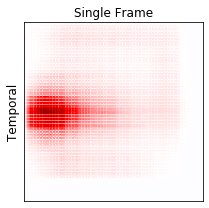

In [20]:
# This figure is generated with heatmap_single.py. This code here is only for getting the format right.

fig = plt.figure(figsize=(3.2,3))

heat = avg_over_samples_s
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(left=False,labelleft=False, right=False,labelright=False, bottom=False,labelbottom=False)
plt.title('Single Frame', fontsize=12)
plt.ylabel('Temporal', fontsize=12)


plt.tight_layout()
plt.savefig(os.path.join(out_dir, "test_original.pdf"), bbox_inches='tight')
plt.show()

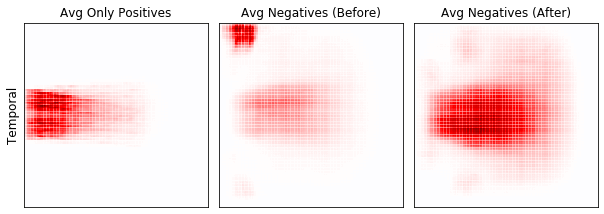

In [30]:
fig = plt.figure(figsize=(8.5,3))

############# TEMPORAL #############
plt.subplot(131)
heat = np.mean(avg_over_positive_samples, axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.title('Avg Only Positives', fontsize=12)
plt.ylabel('Temporal', fontsize=12)


plt.subplot(132)
heat = np.mean(avg_over_negative_samples, axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(left=False,labelleft=False,right=False,labelright=False, bottom=False,labelbottom=False)
plt.title('Avg Negatives (Before)', fontsize=12)

plt.subplot(133)
heat = np.mean(avg_over_negative_samples_after, axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(left=False,labelleft=False,right=False,labelright=False, bottom=False,labelbottom=False)
plt.title('Avg Negatives (After)', fontsize=12)



plt.tight_layout()
plt.savefig(os.path.join(out_dir, "avgs_left.pdf"), bbox_inches='tight')
plt.show()

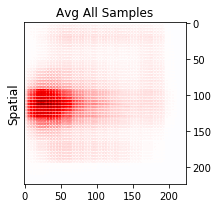

In [8]:
fig = plt.figure(figsize=(3.2,3))

heat = avg_over_samples_s
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(left=False,labelleft=False,right=True,labelright=True)
plt.title('Avg All Samples', fontsize=12)
plt.ylabel('Spatial', fontsize=12)


plt.tight_layout()
plt.savefig(os.path.join(out_dir, "avgs_right.pdf"), bbox_inches='tight')
plt.show()